In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
file1 = files.upload()

Saving period - Copy.csv to period - Copy.csv


In [ ]:
df = pd.read_csv('period - Copy.csv')
df.sample(5)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
161,3,19,28,7,14,6,no,"5'2""",53.0,0,22.0,28,5.0
67,3,19,30,16,14,6,no,5'6,62.0,0,21.6,30,4.5
24,3,14,28,15,14,6,No,5'3,43.0,0,16.7,30,3.0
81,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0
113,2,20,25,14,14,5,no,4' 11,48.0,0,22.2,26,3.0


In [ ]:
df.shape

(162, 13)

In [ ]:
df.isnull().sum()

,0
number_of_peak,0
Age,0
Length_of_cycle,0
Estimated_day_of_ovulution,0
Length_of_Leutal_Phase,0
Length_of_menses,0
Unusual_Bleeding,0
Height,0
Weight,0
Income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_peak              162 non-null    int64  
 1   Age                         162 non-null    int64  
 2   Length_of_cycle             162 non-null    int64  
 3   Estimated_day_of_ovulution  162 non-null    int64  
 4   Length_of_Leutal_Phase      162 non-null    int64  
 5   Length_of_menses            162 non-null    int64  
 6   Unusual_Bleeding            162 non-null    object 
 7   Height                      162 non-null    object 
 8   Weight                      162 non-null    float64
 9   Income                      162 non-null    int64  
 10  BMI                         162 non-null    float64
 11  Mean_of_length_of_cycle     162 non-null    int64  
 12  Menses_score                162 non-null    float64
dtypes: float64(3), int64(8), object(2)


In [ ]:
def pcod_label(row):
    cycle_irregular = (row["Length_of_cycle"] > 35 or
                      row["Length_of_cycle"] < 21 or
                      abs(row['Length_of_cycle'] - row['Mean_of_length_of_cycle']) > 10)  # Fixed this line

    supporting_factors = [
        row['BMI'] >= 25,
        row['Unusual_Bleeding'].lower() == 'yes',
        row['Menses_score'] >= 4,
        row['number_of_peak'] >= 4
    ]
    return 1 if (cycle_irregular and any(supporting_factors)) else 0
df['pcod'] = df.apply(pcod_label, axis=1)

In [ ]:
df.head(10)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score,pcod
0,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0,0
1,4,18,25,17,10,6,yes,5 6,76.0,0,26.3,30,5.0,0
2,2,19,30,17,13,4,no,5 3,56.0,0,21.9,30,2.0,0
3,3,19,28,16,14,6,no,5 1,61.0,0,25.4,30,3.0,0
4,2,19,35,18,15,5,no,5'3,55.0,0,21.5,35,5.0,0
5,5,19,30,15,10,6,yes,5'3,50.0,0,19.0,30,2.0,0
6,3,19,40,10,12,5,yes,5'4,60.0,0,22.3,40,3.0,1
7,2,20,30,14,10,5,no,5'1,58.0,0,24.5,30,5.0,0
8,3,18,30,16,14,5,no,5'3,60.0,0,22.2,30,5.0,0
9,3,19,27,15,16,6,yes,5'4,51.0,0,19.2,30,3.0,0


pcod
0    144
1     18
Name: count, dtype: int64


<Axes: xlabel='pcod', ylabel='count'>

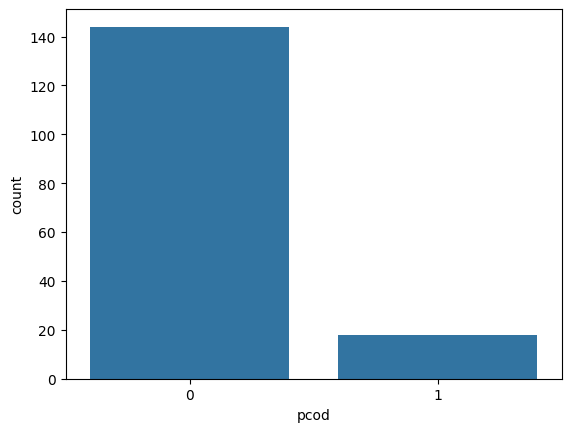

In [ ]:
print(df['pcod'].value_counts())
sns.countplot(x='pcod', data=df)

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

df_majority = df[df['pcod'] == 0]
df_minority = df[df['pcod'] == 1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=140,
                                random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_balanced['pcod'].value_counts()

,count
pcod,
0,144
1,140


In [ ]:
print("shape of orginal dataframe : ",df.shape)
print("shape of resampled dataframe : ",df_balanced.shape)
print(df.info())
print(df_balanced.info())

shape of orginal dataframe :  (162, 14)
shape of resampled dataframe :  (284, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_peak              162 non-null    int64  
 1   Age                         162 non-null    int64  
 2   Length_of_cycle             162 non-null    int64  
 3   Estimated_day_of_ovulution  162 non-null    int64  
 4   Length_of_Leutal_Phase      162 non-null    int64  
 5   Length_of_menses            162 non-null    int64  
 6   Unusual_Bleeding            162 non-null    object 
 7   Height                      162 non-null    object 
 8   Weight                      162 non-null    float64
 9   Income                      162 non-null    int64  
 10  BMI                         162 non-null    float64
 11  Mean_of_length_of_cycle     162 non-null    int64  
 12  Menses_sco

<Axes: xlabel='pcod', ylabel='count'>

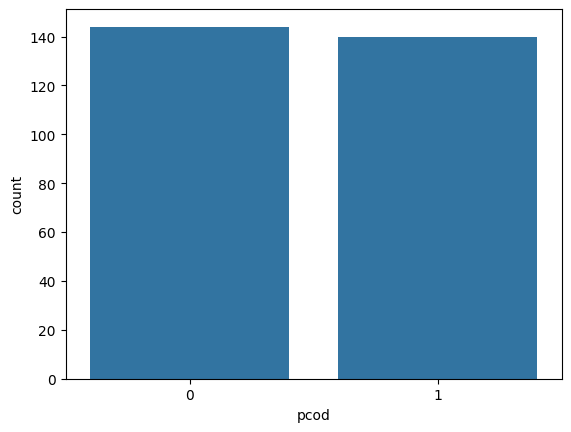

In [ ]:
sns.countplot(x='pcod', data=df_balanced)

In [ ]:
df_balanced.sample(10)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score,pcod
87,3,19,40,10,12,5,yes,5'4,60.0,0,22.30,40,3.0,1
73,2,20,28,14,14,5,no,5'2,57.0,0,23.60,30,2.0,0
62,3,20,40,22,30,5,no,5'3,55.0,0,20.70,46,5.0,1
19,2,20,28,13,10,6,no,5'4,53.0,0,20.10,28,4.0,0
62,3,20,40,22,30,5,no,5'3,55.0,0,20.70,46,5.0,1
154,2,20,28,14,14,5,no,5'2,57.0,0,23.60,30,2.0,0
153,3,20,40,14,14,5,No,5'4,47.0,0,18.40,34,4.0,1
122,3,20,22,18,15,6,yes,5'3,48.0,0,18.75,40,5.0,1
89,3,18,30,16,14,5,no,5'3,60.0,0,22.20,30,5.0,0
105,3,14,28,15,14,6,No,5'3,43.0,0,16.70,30,3.0,0


In [ ]:
df_balanced["Unusual_Bleeding"].value_counts()

,count
Unusual_Bleeding,
no,175
yes,80
No,25
NO,4


In [ ]:
df_balanced["Unusual_Bleeding"].replace({"No":"no","NO":"no"}, inplace=True)

/tmp/ipython-input-1822708164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_balanced["Unusual_Bleeding"].replace({"No":"no","NO":"no"}, inplace=True)


In [ ]:
le = LabelEncoder()
df_balanced["Unusual_Bleeding"]=le.fit_transform(df_balanced["Unusual_Bleeding"])
df_balanced.head()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score,pcod
0,3,18,27,14,9,5,0,5 6,76.0,0,26.3,30,4.0,0
1,4,18,25,17,10,6,1,5 6,76.0,0,26.3,30,5.0,0
2,2,19,30,17,13,4,0,5 3,56.0,0,21.9,30,2.0,0
3,3,19,28,16,14,6,0,5 1,61.0,0,25.4,30,3.0,0
4,2,19,35,18,15,5,0,5'3,55.0,0,21.5,35,5.0,0


In [ ]:
df_normalise = df_balanced.drop(columns=["pcod","Unusual_Bleeding","Height","Weight"], axis=1)
df_normalise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 74
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_peak              284 non-null    int64  
 1   Age                         284 non-null    int64  
 2   Length_of_cycle             284 non-null    int64  
 3   Estimated_day_of_ovulution  284 non-null    int64  
 4   Length_of_Leutal_Phase      284 non-null    int64  
 5   Length_of_menses            284 non-null    int64  
 6   Income                      284 non-null    int64  
 7   BMI                         284 non-null    float64
 8   Mean_of_length_of_cycle     284 non-null    int64  
 9   Menses_score                284 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 24.4 KB


In [ ]:
df_normalise.head(5)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,0,26.3,30,4.0
1,4,18,25,17,10,6,0,26.3,30,5.0
2,2,19,30,17,13,4,0,21.9,30,2.0
3,3,19,28,16,14,6,0,25.4,30,3.0
4,2,19,35,18,15,5,0,21.5,35,5.0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_normalise)
df_normalise = pd.DataFrame(df_scaled, columns = df_normalise.columns)
df_normalise.head(5)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,0.469336,-1.141363,-0.721013,-0.653754,-1.021139,-0.075743,0.0,2.038385,-0.337823,0.162348
1,1.950352,-1.141363,-1.054240,0.301646,-0.820999,1.119308,0.0,2.038385,-0.337823,1.055888
2,-1.011680,-0.295026,-0.221173,0.301646,-0.220577,-1.270793,0.0,0.392769,-0.337823,-1.624734
3,0.469336,-0.295026,-0.554400,-0.016820,-0.020437,1.119308,0.0,1.701781,-0.337823,-0.731193
4,-1.011680,-0.295026,0.611893,0.620113,0.179704,-0.075743,0.0,0.243168,0.305218,1.055888


In [ ]:
df_new = pd.concat([df_normalise.reset_index(drop=True), df_balanced[["Unusual_Bleeding","pcod"]].reset_index(drop=True)], axis=1)

In [ ]:
df_new.head(5)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Income,BMI,Mean_of_length_of_cycle,Menses_score,Unusual_Bleeding,pcod
0,0.552199,-1.249886,-1.122856,-0.570679,-0.961575,0.067263,0.0,1.978412,-0.434261,0.285073,0,0
1,2.220298,-1.249886,-1.471494,0.332032,-0.771618,1.286396,0.0,1.978412,-0.434261,1.239704,1,0
2,-1.115901,-0.370112,-0.599898,0.332032,-0.201747,-1.151871,0.0,0.409746,-0.434261,-1.624190,0,0
3,0.552199,-0.370112,-0.948537,0.031128,-0.011790,1.286396,0.0,1.657549,-0.434261,-0.669559,0,0
4,-1.115901,-0.370112,0.271697,0.632935,0.178167,0.067263,0.0,0.267140,0.294533,1.239704,0,0


In [ ]:
df_new.corr()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Income,BMI,Mean_of_length_of_cycle,Menses_score,Unusual_Bleeding,pcod
number_of_peak,1.000000,0.062681,0.285139,-0.096806,0.026178,0.061033,NaN,-0.221750,0.184463,0.158871,0.227245,0.303255
Age,0.062681,1.000000,0.038156,0.024301,0.184654,-0.167427,NaN,-0.007013,-0.068750,0.125781,-0.135071,0.091693
Length_of_cycle,0.285139,0.038156,1.000000,0.279493,0.383662,-0.115008,NaN,-0.332036,0.757231,0.289568,0.019578,0.888001
Estimated_day_of_ovulution,-0.096806,0.024301,0.279493,1.000000,0.523468,-0.083052,NaN,-0.165679,0.420653,0.410118,-0.364577,0.287550
Length_of_Leutal_Phase,0.026178,0.184654,0.383662,0.523468,1.000000,-0.069480,NaN,-0.090774,0.517895,0.449830,-0.127695,0.313695
Length_of_menses,0.061033,-0.167427,-0.115008,-0.083052,-0.069480,1.000000,NaN,0.131907,0.134604,0.032997,0.147134,-0.170577
Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,-0.221750,-0.007013,-0.332036,-0.165679,-0.090774,0.131907,NaN,1.000000,-0.077947,-0.208770,0.100853,-0.423144
Mean_of_length_of_cycle,0.184463,-0.068750,0.757231,0.420653,0.517895,0.134604,NaN,-0.077947,1.000000,0.382415,0.081219,0.662739
Menses_score,0.158871,0.125781,0.289568,0.410118,0.449830,0.032997,NaN,-0.208770,0.382415,1.000000,-0.069760,0.387395


In [ ]:
features = df_new.corr()['pcod'].abs().sort_values(ascending=False)
print(features)

pcod                          1.000000
Mean_of_length_of_cycle       0.543698
Menses_score                  0.512494
Length_of_cycle               0.456654
BMI                           0.437589
Unusual_Bleeding              0.415907
Estimated_day_of_ovulution    0.375930
Length_of_Leutal_Phase        0.339292
number_of_peak                0.316741
Age                           0.013097
Length_of_menses              0.007350
Income                             NaN
Name: pcod, dtype: float64


In [ ]:
Features = df_new[features.index]

In [ ]:
Target = Features['pcod']
Features = Features.drop(['pcod','Income','Length_of_cycle'], axis=1)
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mean_of_length_of_cycle     284 non-null    float64
 1   Menses_score                284 non-null    float64
 2   BMI                         284 non-null    float64
 3   Unusual_Bleeding            284 non-null    int64  
 4   Estimated_day_of_ovulution  284 non-null    float64
 5   Length_of_Leutal_Phase      284 non-null    float64
 6   number_of_peak              284 non-null    float64
 7   Age                         284 non-null    float64
 8   Length_of_menses            284 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 20.1 KB


In [ ]:
Features.head(5)

,Mean_of_length_of_cycle,Menses_score,BMI,Unusual_Bleeding,Estimated_day_of_ovulution,Length_of_Leutal_Phase,number_of_peak,Age,Length_of_menses
0,-0.337823,0.162348,2.038385,0,-0.653754,-1.021139,0.469336,-1.141363,-0.075743
1,-0.337823,1.055888,2.038385,1,0.301646,-0.820999,1.950352,-1.141363,1.119308
2,-0.337823,-1.624734,0.392769,0,0.301646,-0.220577,-1.011680,-0.295026,-1.270793
3,-0.337823,-0.731193,1.701781,0,-0.016820,-0.020437,0.469336,-0.295026,1.119308
4,0.305218,1.055888,0.243168,0,0.620113,0.179704,-1.011680,-0.295026,-0.075743


In [ ]:
print(Features.shape)
print(Target.shape)

(290, 9)
(290,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.2, random_state=42, stratify=Target)
print(len(X_train))
print(len(X_test))

227
57


In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("\n\t\t\t\t Logistic Regression\n")
print("Training score : ",lr.score(X_train,Y_train))
y_pred = lr.predict(X_test)
accuracy=accuracy_score(Y_test, y_pred)
print("Accuracy  : ",round(accuracy,2))
print("Classification Report : \n",classification_report(Y_test, y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(Y_test, y_pred))


				 Logistic Regression

Training score :  0.9074889867841409
Accuracy  :  0.84
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.83      0.86      0.84        28

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57


Confusion Matrix : 
 [[24  5]
 [ 4 24]]


In [ ]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Any overlap: {len(set(X_train.index) & set(X_test.index))}")

Train shape: (227, 9), Test shape: (57, 9)
Any overlap: 0


In [ ]:
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rfc.fit(X_train, Y_train)
print("\n\t\t\t\t Random Forest Classifier\n")
print("Training Score : ",rfc.score(X_train, Y_train))
y_pred = rfc.predict(X_test)
accuracy=accuracy_score(Y_test, y_pred)
print("Accuracy : ",round(accuracy,2))
print("Classification Report : \n",classification_report(Y_test, y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(Y_test, y_pred))


				 Random Forest Classifier

Training Score :  0.9955947136563876
Accuracy :  0.98
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        28

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57


Confusion Matrix : 
 [[28  1]
 [ 0 28]]


In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)
print("\n\t\t\t\t Support Vector Classifier\n")
print("Training Score : ",svc_model.score(X_train, Y_train))
y_pred = svc_model.predict(X_test)
accuracy=accuracy_score(Y_test, y_pred)
print("Accuracy  : ",round(accuracy,2))
print("Classification Report : \n",classification_report(Y_test, y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(Y_test, y_pred))


				 Support Vector Classifier

Training Score :  0.9074889867841409
Accuracy  :  0.82
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.82      0.82      0.82        28

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57


Confusion Matrix : 
 [[24  5]
 [ 5 23]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print("\n\t\t\t\t KNeighbors Classifier\n")
print("Training Score : ",knn.score(X_train, Y_train))
y_pred = knn.predict(X_test)
accuracy=accuracy_score(Y_test, y_pred)
print("Accuracy : ",round(accuracy,2))
print("Classification Report : \n",classification_report(Y_test, y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(Y_test, y_pred))


				 KNeighbors Classifier

Training Score :  0.9823788546255506
Accuracy :  0.96
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.93      1.00      0.97        28

    accuracy                           0.96        57
   macro avg       0.97      0.97      0.96        57
weighted avg       0.97      0.96      0.96        57


Confusion Matrix : 
 [[27  2]
 [ 0 28]]


In [ ]:
dt = DecisionTreeClassifier(max_depth =5, random_state=42, criterion='entropy', splitter='best')
dt.fit(X_train, Y_train)
print("\n\t\t\t\t Decision Tree Classifier\n")
print("Training Score : ",dt.score(X_train, Y_train))
y_pred = dt.predict(X_test)
accuracy=accuracy_score(Y_test, y_pred)
print("Accuracy : ",round(accuracy,2))
print("Classification Report : \n",classification_report(Y_test, y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(Y_test, y_pred))


				 Decision Tree Classifier

Training Score :  0.9955947136563876
Accuracy :  0.98
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        28

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57


Confusion Matrix : 
 [[28  1]
 [ 0 28]]
